# 1INF24 Inteligencia Artificial



## Laboratorio #1 - Búsqueda sin información

## Indicaciones generales:

- Duración: **120 minutos (2 horas)**.
- Las respuestas deben contar con **fundamento teórico**.
- Cualquier indicio de plagio resultará en la anulación de la prueba.
- Debe presentar sus respuestas en base a los resultados de ejecución en los casos que se solicite. **No se calificarán aquellas respuestas que no presenten un resultado de ejecución o que no concuerden con este**.
- Subir el cuadernillo con el nombre **lab-02_código.ipynb**, donde código es su código PUCP de 8 dígitos.
- Está prohibido el uso de herramientas de IA. En caso se detecte el uso de estas herramientas la calificación será 00.
- No está permitido el uso de material de clase.

## Objetivos:

- Diferenciar una búsqueda en árboles  de una búsqueda en grafos.
- Identificar en qué casos utilizar DFS o BFS, así como caracterizar cara uno de estos.
- Evaluar el desempeño de una estrategia de búsqueda analizando su completitud, espacio y tiempo.
- Implementar programas de agentes para actuar racionalmente en diferentes ambientes.
- Relacionar los conceptos aprendidos sobre búsqueda sin información con escenarios de la vida cotidiana.

## Clase `SearchProblem`
Esta es una clase abstracta para definir problemas de búsqueda.
Se debe crear subclases que implementen los métodos de las acciones, resultados, test de objetivo y el costo del camino.

In [ ]:
class SearchProblem(object):
    def __init__(self, initial, goal=None):
        """
        Este constructor especifica el estado inicial y el conjunto de estados
        objetivos. La subclase puede añadir más atributos.
        """
        self.initial = initial
        self.goal = goal

    def actions(self, state):
        """Retorna las acciones que pueden ser ejecutadas en el estado dado."""
        raise NotImplementedError

    def result(self, state, action):
        """
        Retorna el estado que resulta de ejecutar la acción `action` en el
        estado `state`. La acción debe ser alguna de `self.actions(state)`.
        """
        raise NotImplementedError

    def goal_test(self, state):
        """Retorna verdadero si el estado `state` es el objetivo."""
        raise NotImplementedError

    def path_cost(self, total_cost, source_state, action, target_state):
        """
        Retorna el costo del nuevo camino que termina en `target_state` tras
        extender un camino que terminaba en `source_state` con costo `total_cost`
        luego de realizar la acción `action`.
        """
        raise NotImplementedError

    def value(self, state):
        """
        En problemas de optimización, cada estado tiene un valor.
        Algoritmos como Hill-climbing intentan maximizar este valor.
        """
        raise NotImplementedError


## Clase `MazeProblem`
Esta subclase de `SearchProblem` define el problema de búsqueda en el laberinto. Dadas las posiciones iniciales de Entrada y la posición en la cual se encuentra el final del laberinto, queremos hallar un camino hacia este (lo ideal sería que fuese el de longitud mínima). Asumir que cada movimiento de tiene costo $1$.

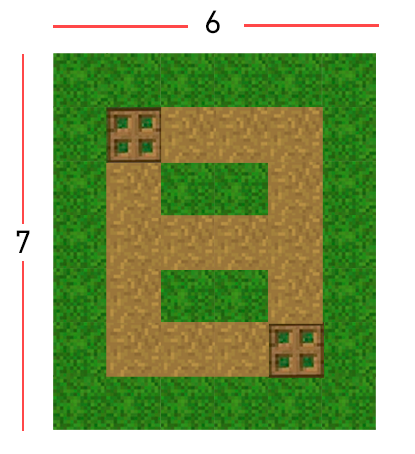

In [ ]:
class MazeProblem(SearchProblem):
    def __init__(self, initial, goal, maze):
        """
        Este constructor especifica el estado inicial (posición del robot)
        y el conjunto de estados objetivos (posición de la salida).
        Asimismo, guardamos el laberinto.
        """
        self.initial = initial
        self.goal = goal
        self.maze = maze

    def actions(self, state):
        """
        Retorna las acciones que pueden ser ejecutadas en el estado dado.
        Recuerda que solo podemos movernos hacia casillas vacías en el laberinto.
        Las posibles acciones son las siguientes:
        'L': izquierda
        'R': derecha
        'U': arriba
        'D': abajo
        """
        actions = []
        row, col = state
        if col > 0 and self.maze[row][col - 1] in [' ', 'E']:
            actions.append('L')
        ##########################
        ### COMPLETAR (INICIO) ###
        ##########################


        #######################
        ### COMPLETAR (FIN) ###
        #######################
        return actions

    def result(self, state, action):
        """
        Retorna el estado que resulta de aplicar la accion `action` sobre
        el estado `state`.
        """
        row, col = state

        if action == 'L':
            return (row, col - 1)

        ##########################
        ### COMPLETAR (INICIO) ###
        ##########################


        #######################
        ### COMPLETAR (FIN) ###
        #######################

    def goal_test(self, state):
        """Retorna verdadero si el estado `state` es el objetivo."""
        return (self.goal == state)

    def path_cost(self, total_cost, source_state, action, target_state):
        """
        Retorna el costo del nuevo camino que termina en `target_state` tras
        extender un camino que terminaba en `source_state` con costo `total_cost`
        luego de realizar la acción `action`.
        """
        ##########################
        ### COMPLETAR (INICIO) ###
        ##########################

        #######################
        ### COMPLETAR (FIN) ###
        #######################



## Clase `Node`
Estructura de datos que almacena la información de un nodo en un grafo.
Contiene información del nodo padre y el estado que representa el nodo.
También incluye la acción que nos llevó al presente nodo y el costo total del camino desde el nodo inicial hasta el nodo actual.

In [ ]:
class Node(object):
    def __init__(self, state, parent=None, action=None, path_cost=0):
        """
        Crea un nodo en un grafo, el cual es expandido por `parent` tras la
        acción `action`.
        """
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost
        self.depth = 0
        if parent is not None:
            self.depth = parent.depth + 1

    def expand(self, problem):
        """Retorna los nodos adyacentes en el grafo."""
        return [self.child_node(problem, action) for action in problem.actions(self.state)]

    def child_node(self, problem, action):
        next = problem.result(self.state, action)
        return Node(next, self, action, problem.path_cost(self.path_cost, self.state, action, next))

    def solution(self):
        """
        Retorna la secuencia de acciones para ir desde el origen hasta el nodo
        actual.
        """
        return [node.action for node in self.path()][1:]

    def path(self):
        """
        Retorna una lista de nodos representando el camino desde el origen hasta
        el nodo actual.
        """
        node, reversed_path = self, []
        while node is not None:
            reversed_path.append(node)
            node = node.parent
        result = list(reversed(reversed_path))
        return result

    def __eq__(self, other):
        """Retorna verdadero cuando los estados son iguales."""
        return isinstance(other, Node) and self.state == other.state



## Definición de las fronteras
Se definen las clases correspondientes a una cola y a una pila para usarlas como fronteras.

In [ ]:
from collections import deque

class FIFO(deque):
    """First-In, First-Out: cola"""
    def pop(self):
        return self.popleft()

class LIFO(deque):
    """Last-In, First-Out: pila"""



## Algoritmo Graph-Search

In [ ]:
def graph_search(problem, frontier):
    # Inicializamos la frontera usando el estado inicial del problema
    node = Node(problem.initial)
    frontier.append(node)

    # Inicializamos el conjunto de nodos explorados en vacío (búsqueda en grafos)
    explored = set()

    # Recuerde que expandir un nodo significa aplicar las acciones
    # legales al estado al cual dicho nodo representa
    expanded_nodes = 0

    # Mientras tengamos nodos en la frontera
    while frontier:
        node = frontier.pop()
        if problem.goal_test(node.state):
            return node, expanded_nodes

        if node.state not in explored:
            explored.add(node.state)
            expanded_nodes += 1
            for child in node.expand(problem):
                if child.state not in explored and child not in frontier:
                    frontier.append(child)
    return None, expanded_nodes



# Algoritmo Breath-First-Search

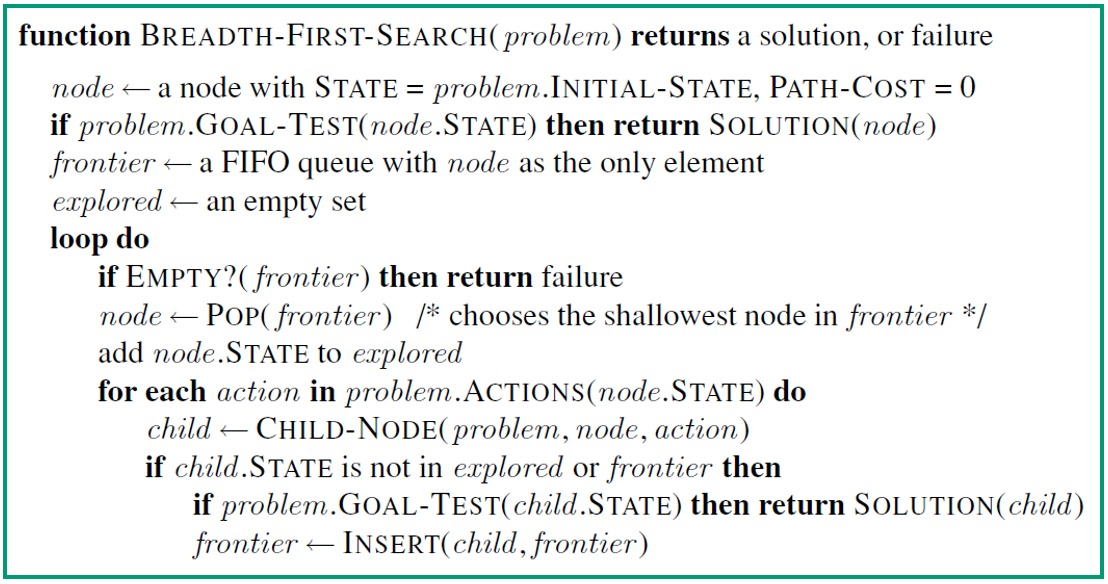

In [ ]:
def breadth_first_search(problem):

        ##########################
        ### COMPLETAR (INICIO) ###
        ##########################

        #######################
        ### COMPLETAR (FIN) ###
        #######################


## Probando los algoritmos de búsqueda
Ejecutar las búsquedas BFS y DFS.

In [ ]:
robot_location = (1, 1)
exit_location = (5, 4)
maze = [
    "######",
    "#S   #",
    "# ## #",
    "#    #",
    "# ## #",
    "#   E#",
    "######"
]

maze_problem = MazeProblem(robot_location, exit_location, maze)

last_node, n_expanded_nodes = graph_search(maze_problem, FIFO())
print(f'Solución obtenida con BFS: {last_node.solution()}. Nodos expandidos: {n_expanded_nodes}.')
assert len(last_node.solution()) == 7

last_node, n_expanded_nodes = graph_search(maze_problem, LIFO())
print(f'Solución obtenida con DFS: {last_node.solution()}. Nodos expandidos: {n_expanded_nodes}.')
assert len(last_node.solution()) >= 7

last_node, n_expanded_nodes = breadth_first_search(maze_problem)
print(f'Solución obtenida con breadth_first_search: {last_node.solution()}. Nodos expandidos: {n_expanded_nodes}.')
assert len(last_node.solution()) >= 7

###PREGUNTA 1
[7 puntos] Complete el código y ejecute satisfactoriamente las pruebas.

[1 puntos] Comente si en BFS y DFS está garantizado encontrar siempre la solución óptima.

* [Respuesta]

[1 punto] ¿Por qué es ventajoso Breath_First_Search en relacion a BFS de graph_search?

* [Respuesta]

###PREGUNTA 2
[2 puntos] Indique y justifique los valores de b y d para el problema del laberinto con la configuración presentada arriba.





* [Respuesta]

###PREGUNTA 3
[1 punto] Indique y justifique el valor de m para el problema del laberinto con la configuración presentada arriba si hubiésemos utilizado tree search.






* [Respuesta]

###PREGUNTA 4
[2 puntos] De forma general, ¿qué característica debería tener un problema de búsqueda para preferir DFS sobre BFS?

* [Respuesta]

Considere un juego de rompecabezas deslizante de 15 piezas (4x4). Este juego tiene aproximadamente 1.3 × 10^13 estados posibles, y cualquier configuración puede ser resuelta en 80 movimientos o menos.

Modelemos el problema de resolver el rompecabezas como un problema de búsqueda, donde los estados son las posibles configuraciones, y existe una arista entre dos estados si es que podemos llegar de un estado al otro en un movimiento. Así, tenemos 1.3 × 10^13 estados. Cada arista tiene costo 1. Note que el grafo del espacio de estados contiene ciclos.

Como podemos realizar 4 movimientos desde cada estado (mover una pieza arriba, abajo, izquierda o derecha, si es posible), el factor de ramificación es 4. Como cualquier configuración puede ser resuelta en 80 movimientos o menos, tenemos que la profundidad del nodo objetivo menos profundo es menor o igual a 80.

Para cada uno de los siguientes casos, estime el número aproximado de nodos generados y justifique. Asuma que la solución más corta para nuestro estado inicial está exactamente a 80 movimientos.

###PREGUNTA 5
[2 puntos] Número aproximado de nodos generados con DFS (búsqueda en árboles; es decir, sin memoria de estados visitados)

Mejor caso:

Peor caso:

###PREGUNTA 6
[2 puntos] número aproximado de nodos generados con DFS (búsqueda en grafos; es decir, con memoria de estados visitados)

Mejor caso:

Peor caso:

###PREGUNTA 7
[2 puntos] ¿Cuántos nodos en memoria se tendrán en el peor caso con los siguientes algoritmos?

BFS (búsqueda en grafos):

DFS (búsqueda en árboles):